In [1]:
import sys
import pylab
import numpy as np
import tkinter
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker

import fgivenx
from fgivenx import plot_contours, samples_from_getdist_chains, plot_lines, plot_dkl


sys.path.append("/home/isidro/Documents/github/SimpleMC/")
from simplemc.plots.plot_Quintom_variables import *
from simplemc.models.owa0CDMCosmology import owa0CDMCosmology
from simplemc.models.LCDMCosmology import LCDMCosmology
from simplemc.cosmo.paramDefs import *

%matplotlib inline

Initalizing nu density look up table... 

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


Done


In [3]:
def eos(z, params):
    w0, wa = params
    return w0 + (z/(1+z))*wa

/tmp/ipykernel_7120/1947448182.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('OrRd_r')


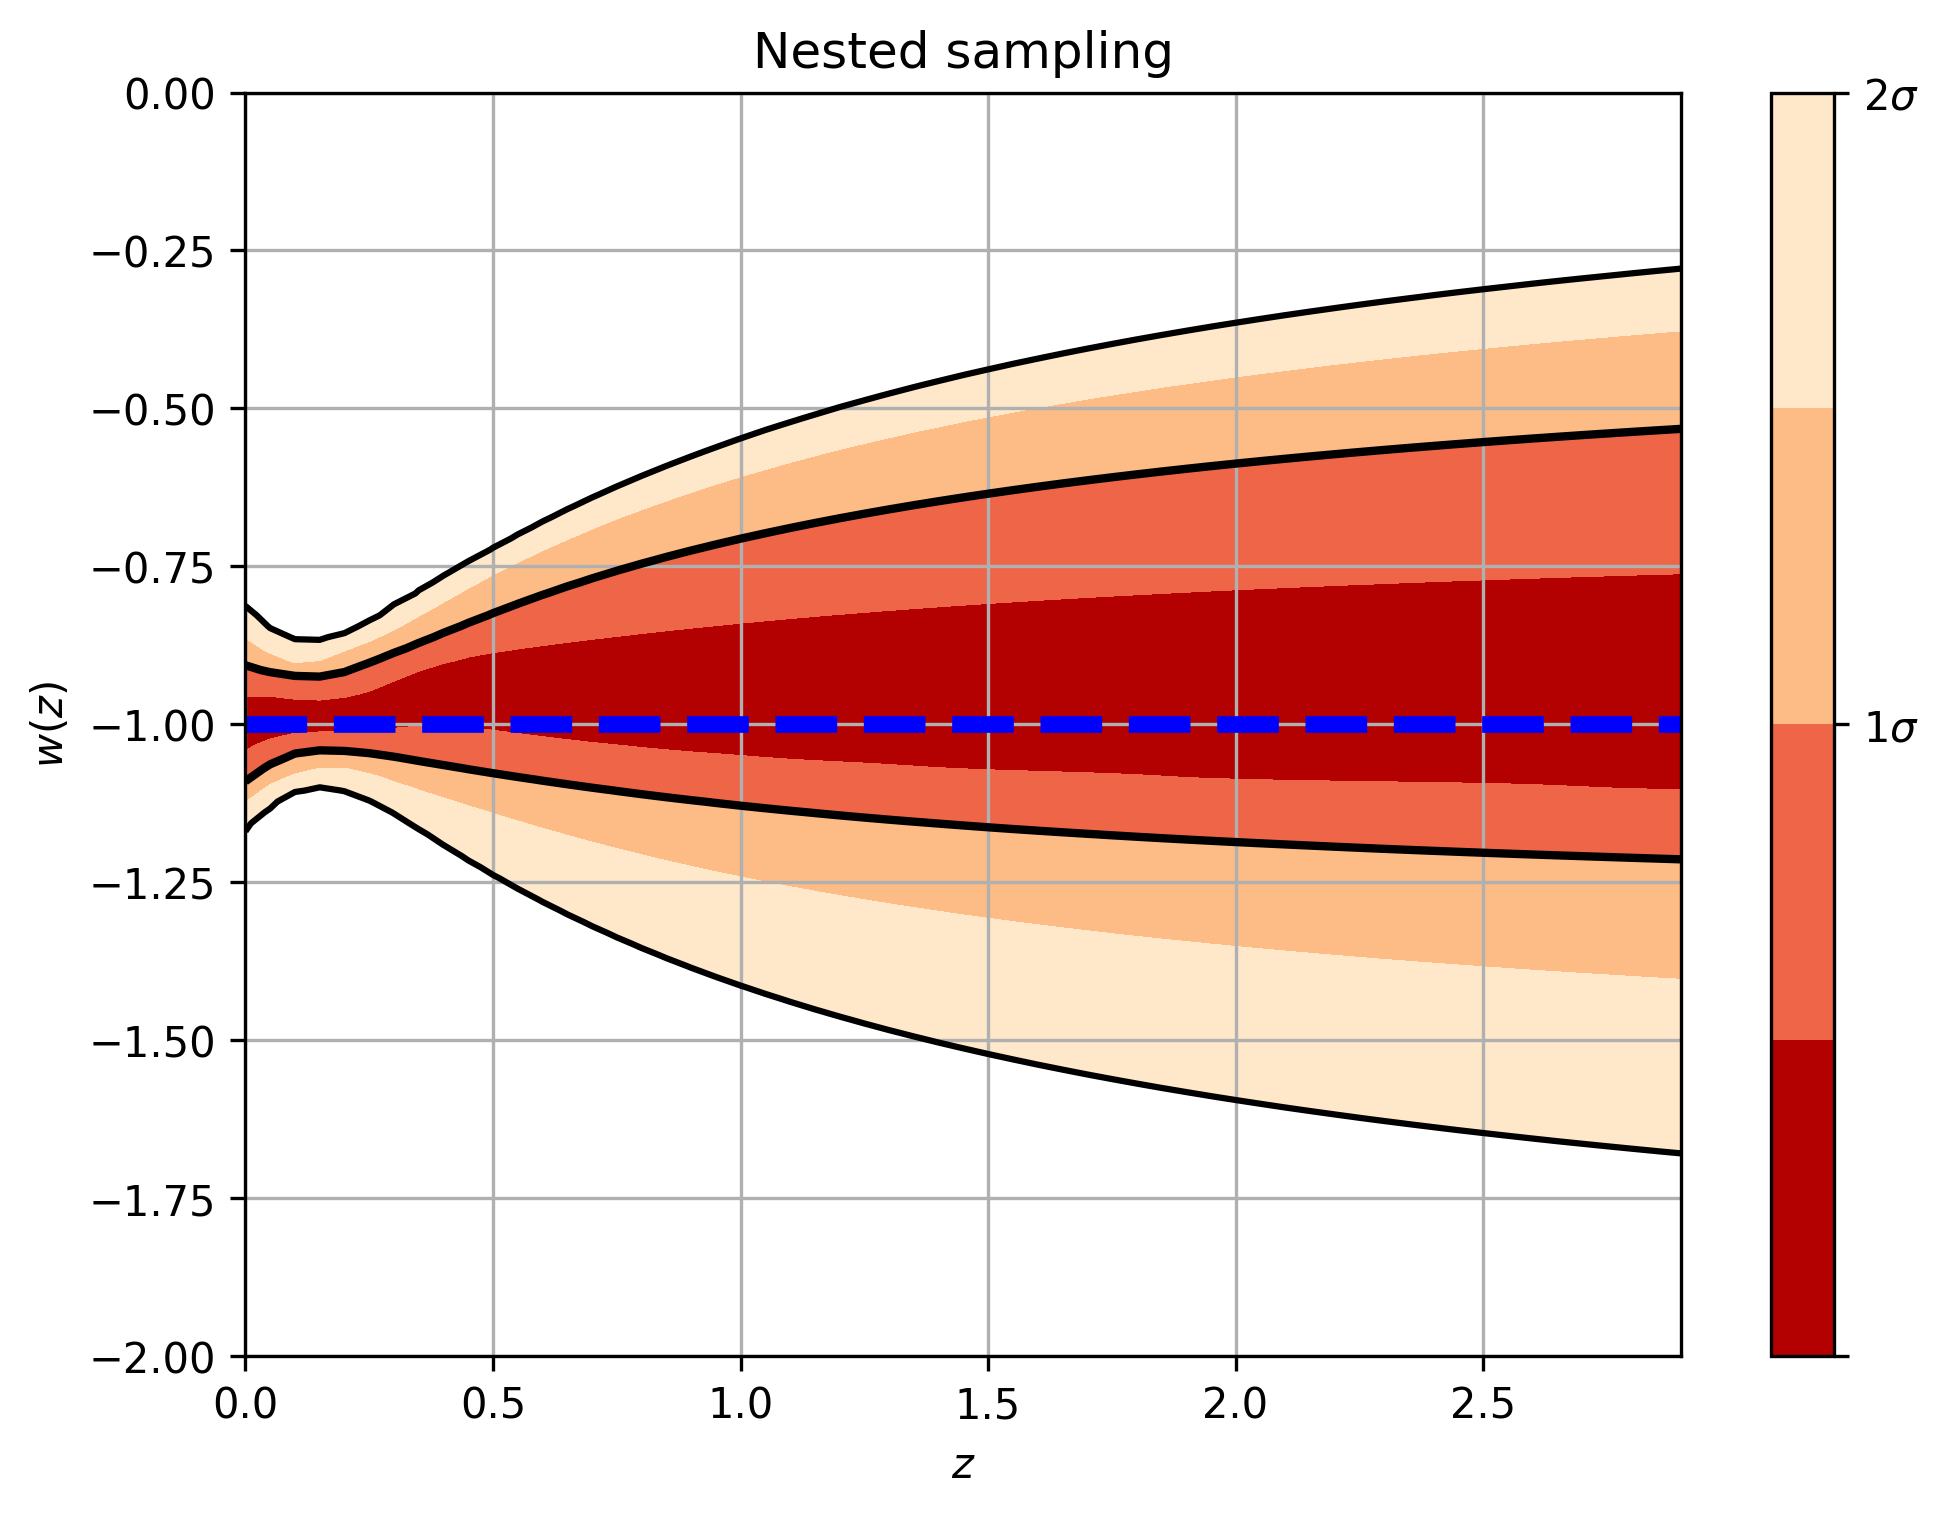

In [31]:
dir_name = 'chains/'
file_root = dir_name + 'waCDM_phy_Pantheon+HD+DR16BAO_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('OrRd_r')

fig = plt.figure(figsize=(7,5), dpi=300)

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root,
                                               settings={'ignore_rows':0.2})
# k = np.linspace(0,2,9)
k = np.arange(0, 3.1, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='blue',  linestyles='dashed', label='$w=-1$', lw=4)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 2.9)
plt.tight_layout()
plt.grid()
plt.title("Nested sampling")
# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'BAO', fontsize=13)
plt.savefig('givenx_nested_eos_CPL.png')
# plt.savefig('img/eos_quintom_couple_cbao_burn5.svg')

/tmp/ipykernel_7120/3939027145.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_reversed = matplotlib.cm.get_cmap('OrRd_r')


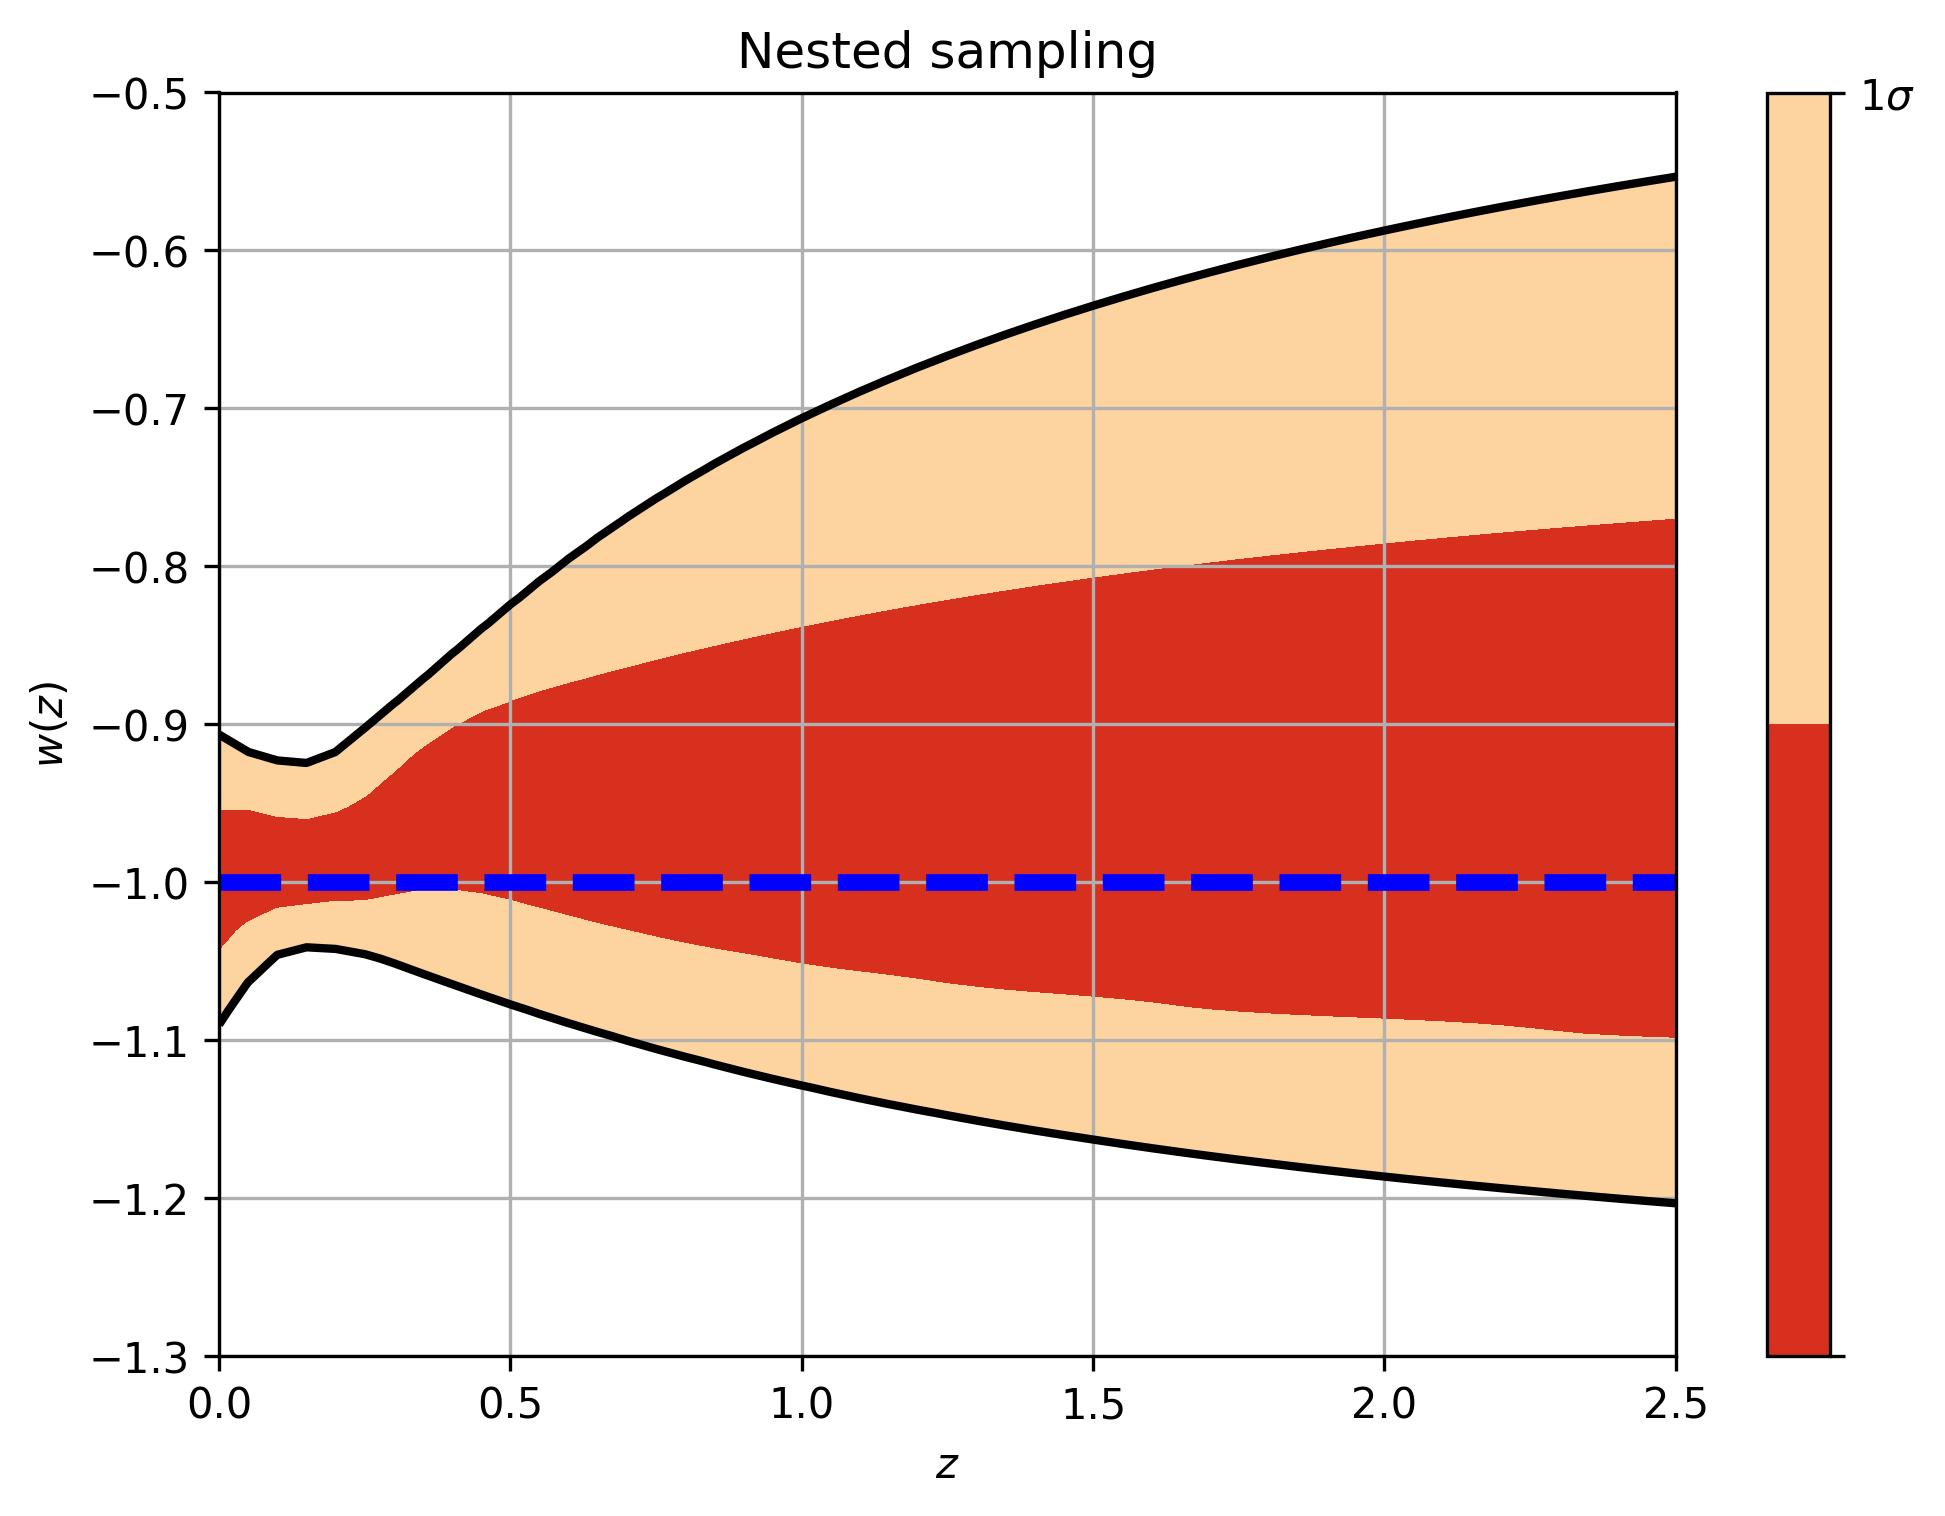

In [41]:
dir_name = 'chains/'
file_root = dir_name + 'waCDM_phy_Pantheon+HD+DR16BAO_nested_multi'
cmap_reversed = matplotlib.cm.get_cmap('OrRd_r')

fig = plt.figure(figsize=(7,5), dpi=300)

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root,
                                               settings={'ignore_rows':0.2})
# k = np.linspace(0,2,9)
k = np.arange(0, 2.6, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='blue',  linestyles='dashed', label='$w=-1$', lw=4)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.ylim(-1.3,-0.5)
plt.xlim(0, 2.5)
plt.tight_layout()
plt.grid()
plt.title("Nested sampling")
# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'BAO', fontsize=13)
plt.savefig('givenx_nested_eos_CPL.png')
# plt.savefig('img/eos_quintom_couple_cbao_burn5.svg')

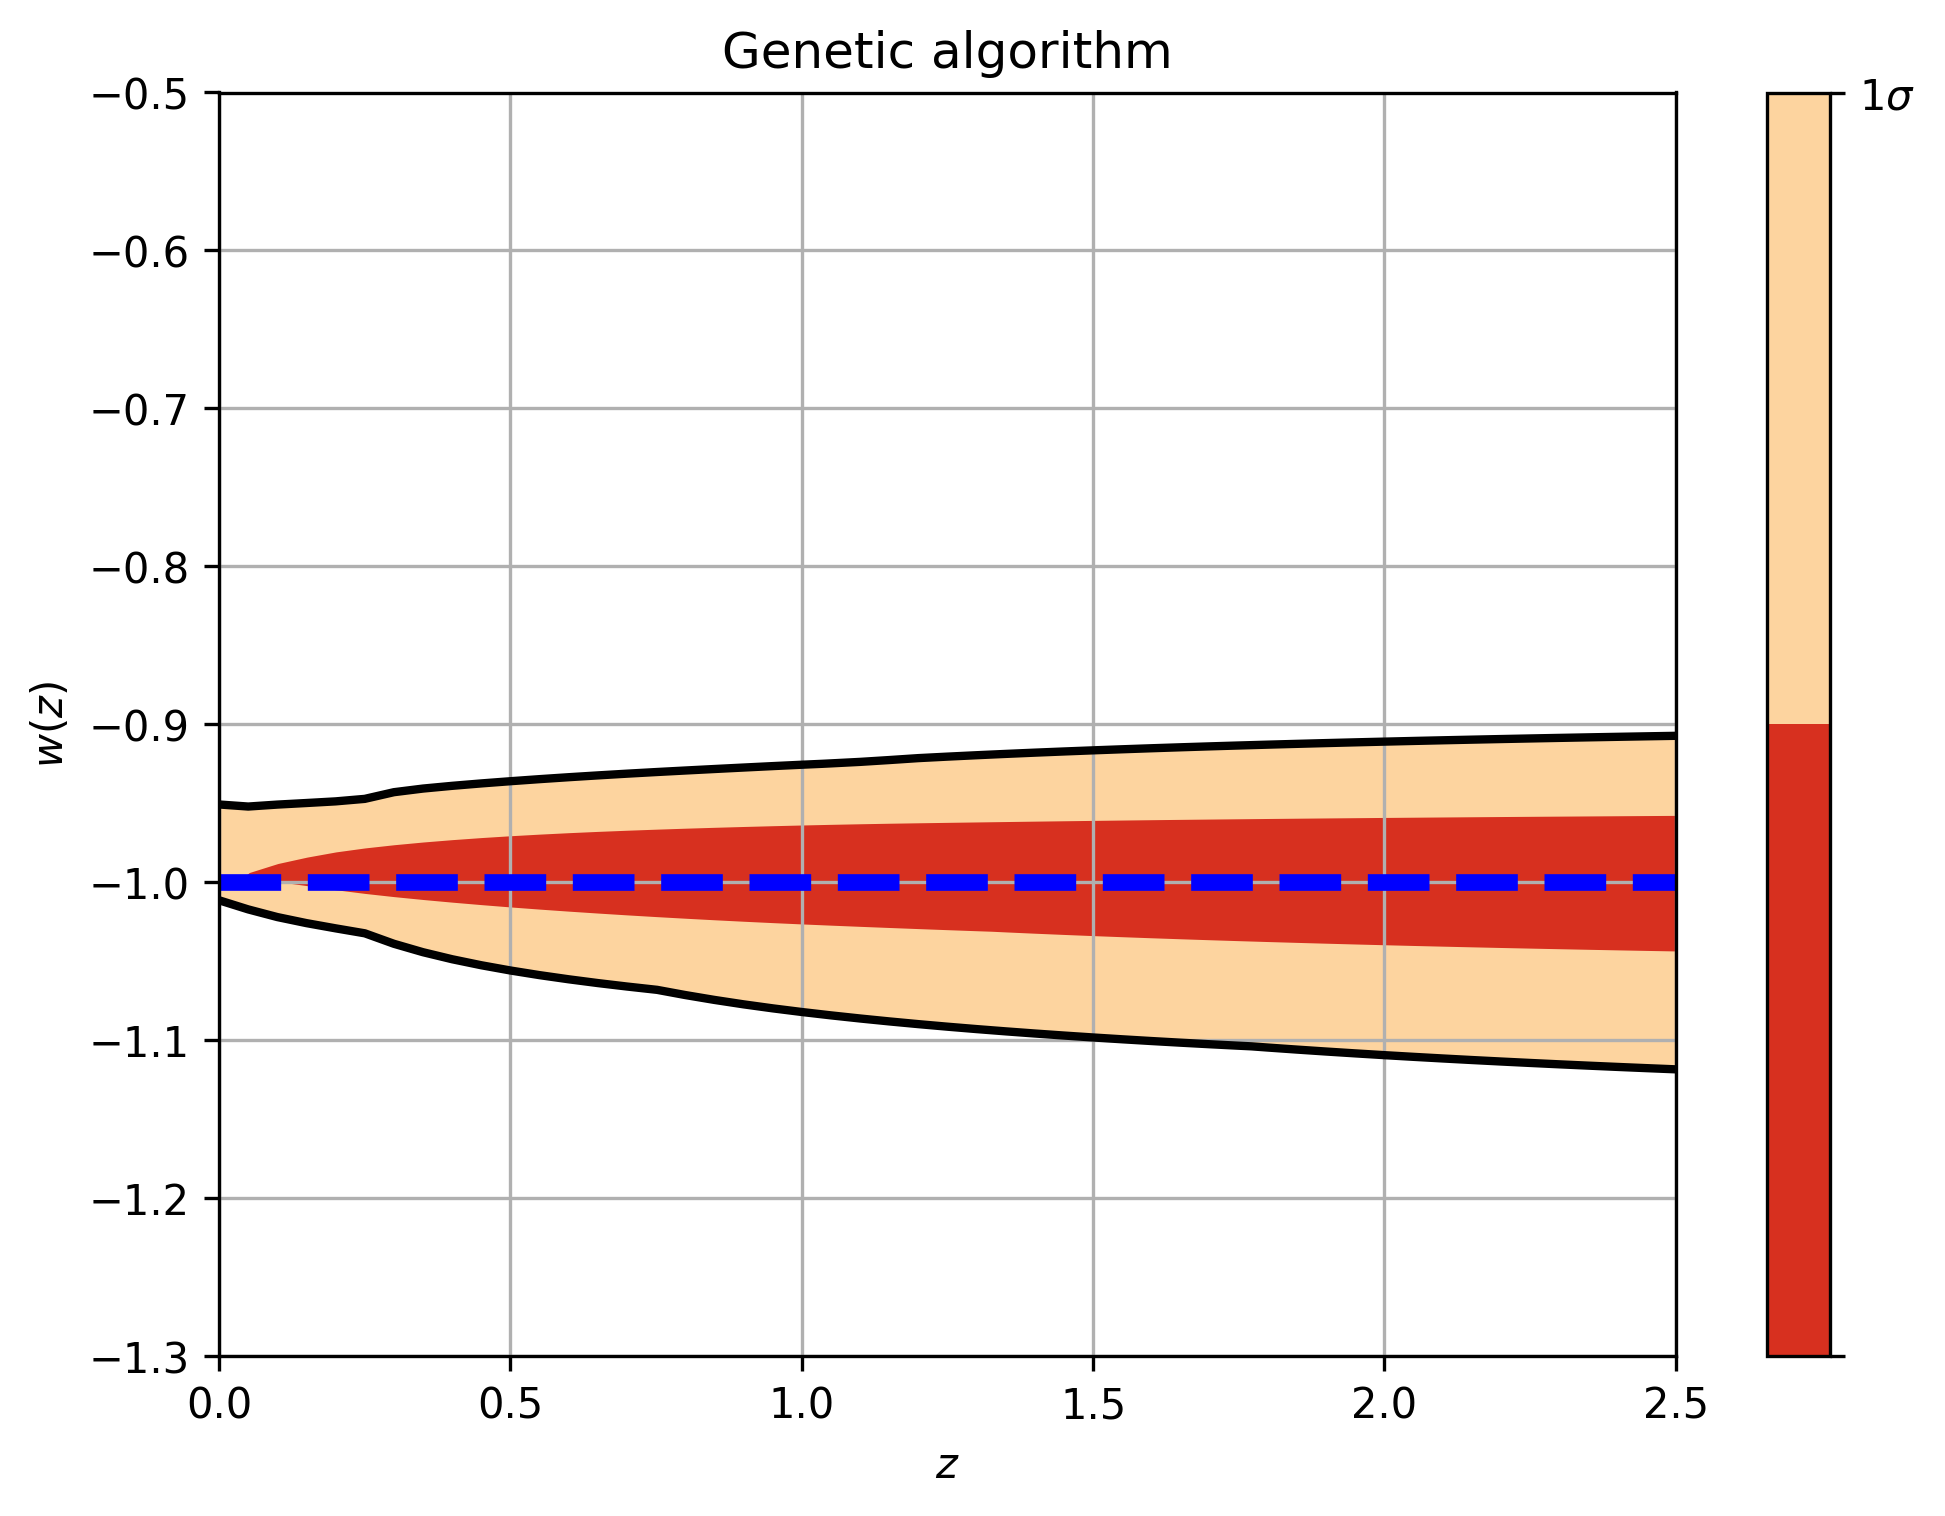

In [42]:
dir_name = 'chains/'
file_root = dir_name + 'waCDM_phy_Pantheon+HD+DR16BAO_ga_deap'

fig = plt.figure(figsize=(7,5), dpi=300)

samples, weights = samples_from_getdist_chains(['w', 'wa'], file_root,
                                               settings={'ignore_rows':0.2})
# k = np.linspace(0,2,9)
k = np.arange(0, 2.6, 0.05)

cbar = plot_contours(eos, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1], 
                     linewidths=[2])

cbar = plt.colorbar(cbar,ticks=[0,1,2])

cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='blue',  linestyles='dashed', label='$w=-1$', lw=4)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.ylim(-1.3,-0.5)
plt.xlim(0, 2.5)
plt.tight_layout()
plt.grid()
plt.title("Genetic algorithm")

# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'BAO', fontsize=13)
plt.savefig('fgivenx_genetic_eos_CPL.png')
# plt.savefig('img/eos_quintom_couple_cbao_burn5.svg')

## Graduated

In [25]:
def eos_grad(z, params):
    lambda_par = -20
    ggama = params
    a = z/(1+z)
    denominator = 1+3*ggama*(lambda_par-1)*np.log(a)
    return -1 + (ggama/denominator)

/tmp/ipykernel_7120/55626922.py:5: RuntimeWarning: divide by zero encountered in log
  denominator = 1+3*ggama*(lambda_par-1)*np.log(a)


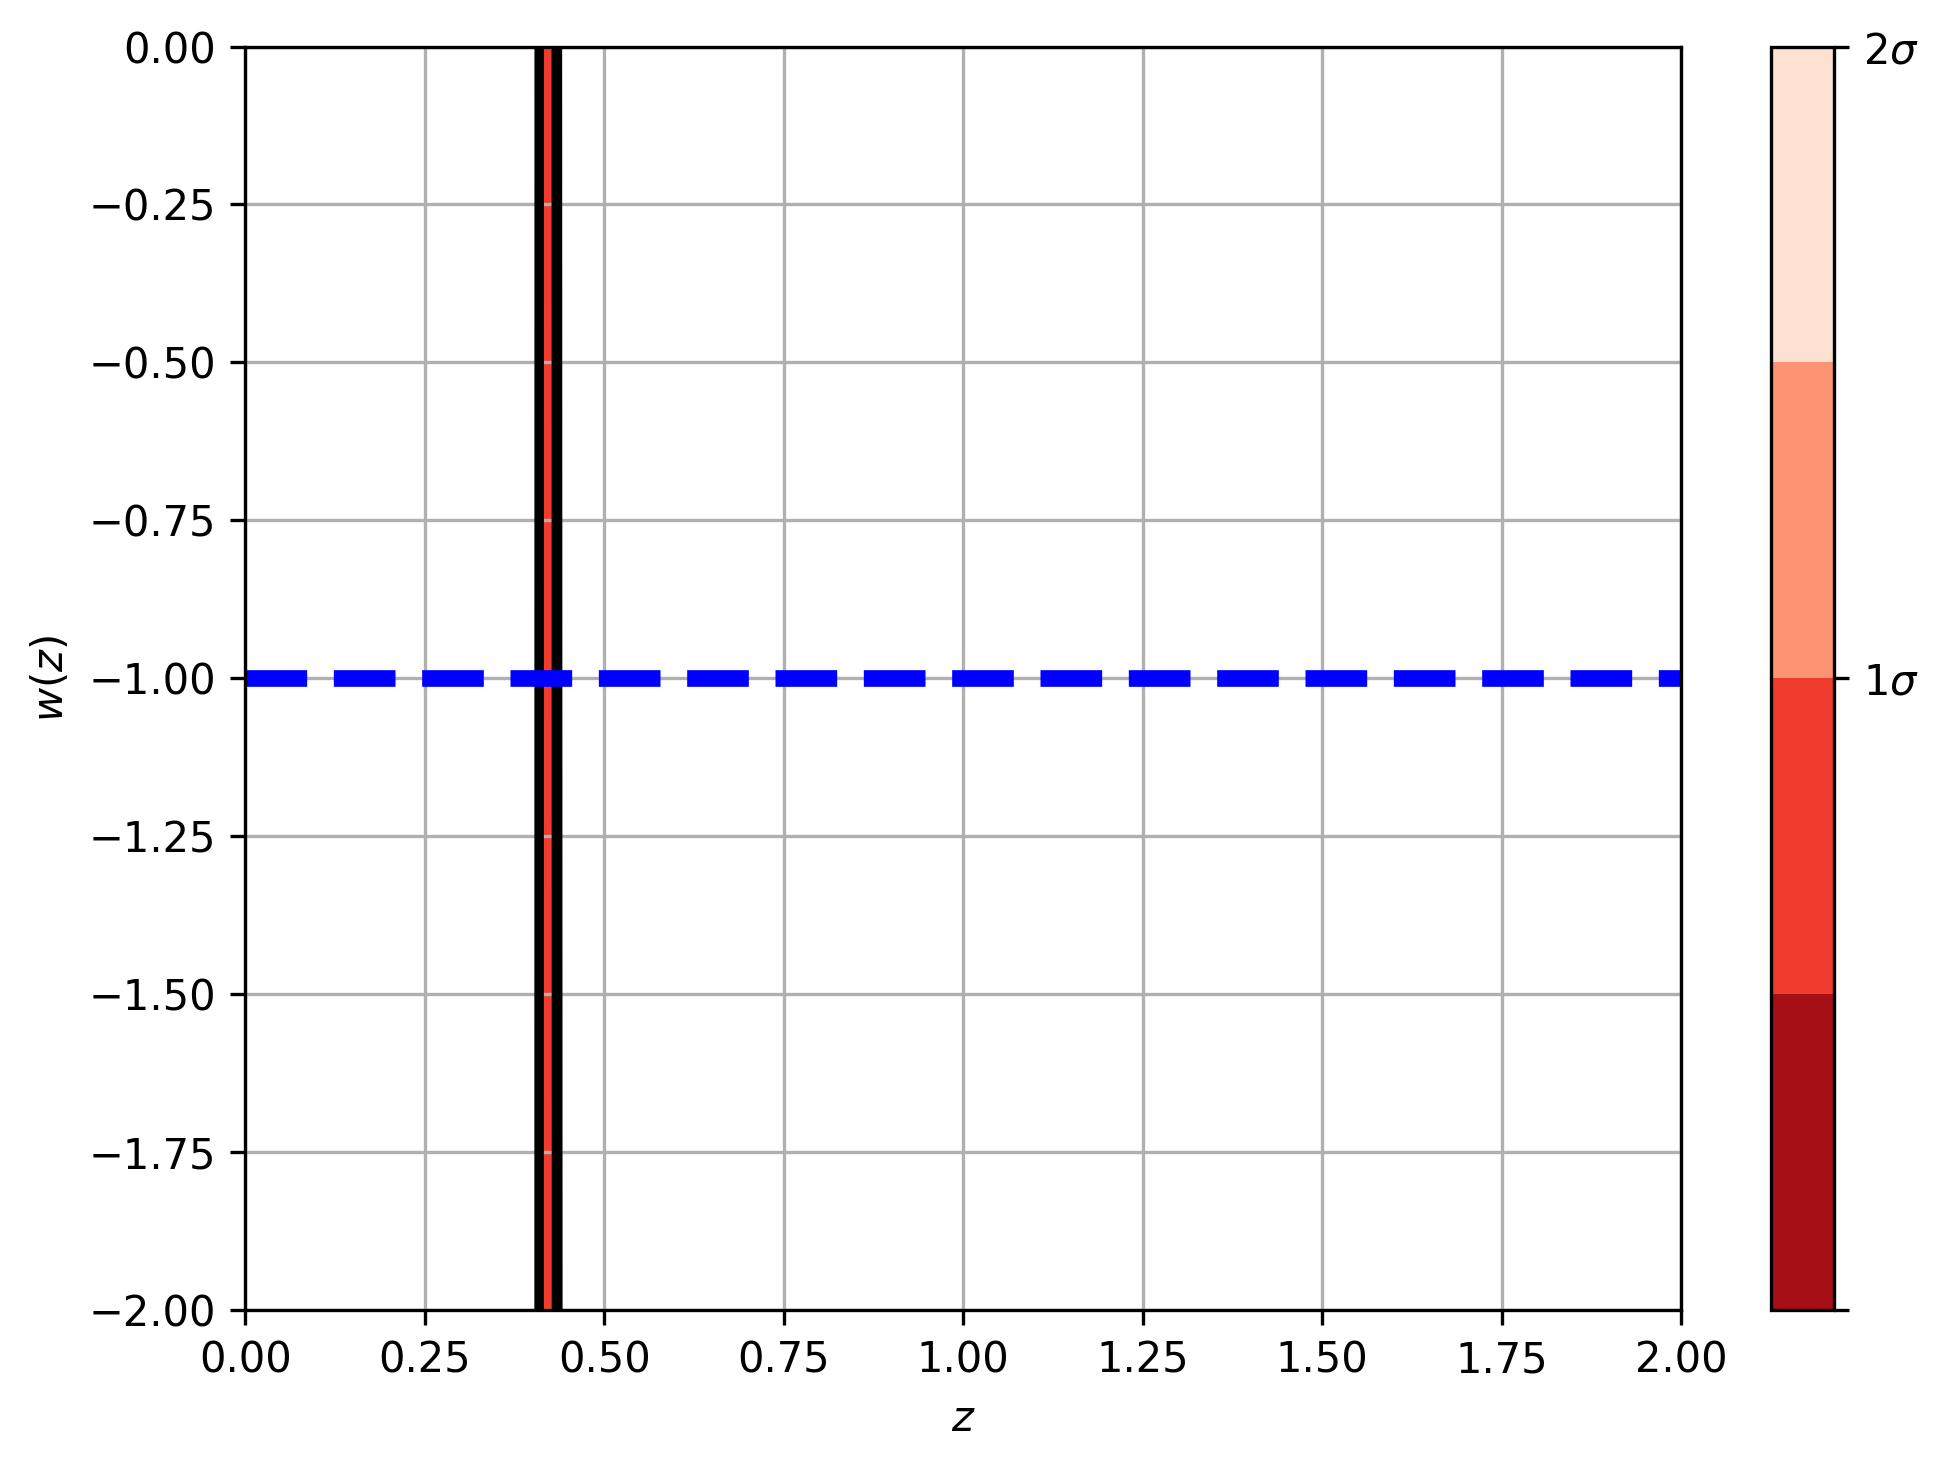

In [26]:
dir_name = 'chains_graduated_LE/'
file_root = dir_name + 'Grad_phy_HD+BBAO+SN_nested_multi'

fig = plt.figure(figsize=(7,5), dpi=300)

samples, weights = samples_from_getdist_chains(['ggama'], file_root,
                                               settings={'ignore_rows':0.1})
# k = np.linspace(0,2,9)
k = np.arange(0, 3, 0.01)

cbar = plot_contours(eos_grad, k, samples, weights=weights, colors=cmap_reversed, contour_line_levels=[1,2], 
                     linewidths=[2,1.5])
cbar = plt.colorbar(cbar,ticks=[0,1,2],  )
cbar.set_ticklabels(['',r'$1\sigma$',r'$2\sigma$'])
plt.hlines(-1, xmin=0, xmax=3, colors='blue',  linestyles='dashed', label='$w=-1$', lw=4)
# plt.ylabel(r'$H(z)/(1+z)[km\;s^{-1}Mpc^{-1}]$')
plt.ylabel(r'$w(z)$')
plt.xlabel(r'$z$')
plt.ylim(-2,0)
plt.xlim(0, 2.0)
plt.tight_layout()
plt.grid()

# plt.legend(loc='lower left')
# plt.text(0.01,-1.7, 'BAO', fontsize=13)
# plt.savefig('img/eos_quintom_couple_cbao_burn5.png')
# plt.savefig('img/eos_quintom_couple_cbao_burn5.svg')